<a href="https://colab.research.google.com/github/Driyaannt/PCVK_Ganjil_2023/blob/main/2141720224_week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Global Threshold

In [ ]:
import cv2 as cv
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from PIL import Image

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = ('/content/drive/MyDrive/images/week10/gradient.jpg')
img = cv.imread(filename)

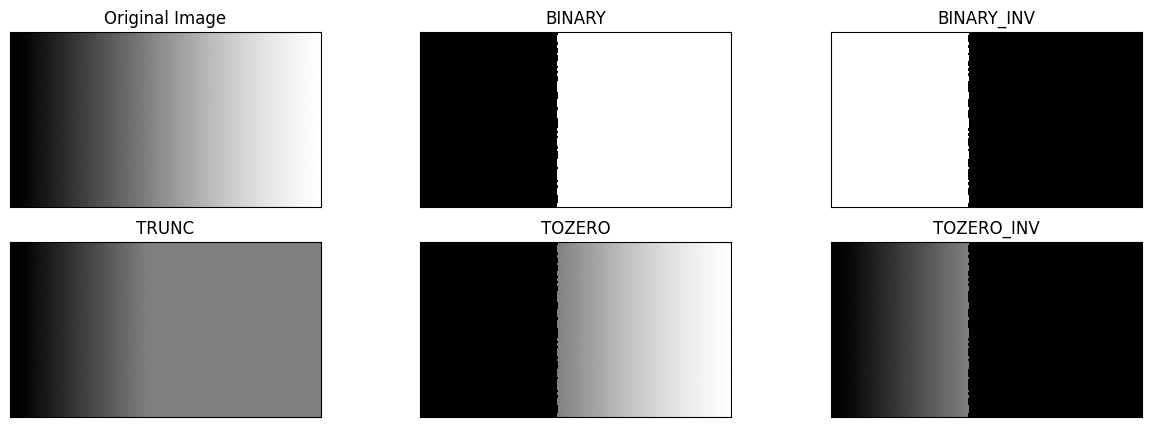

In [ ]:
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selainitu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive Threshold

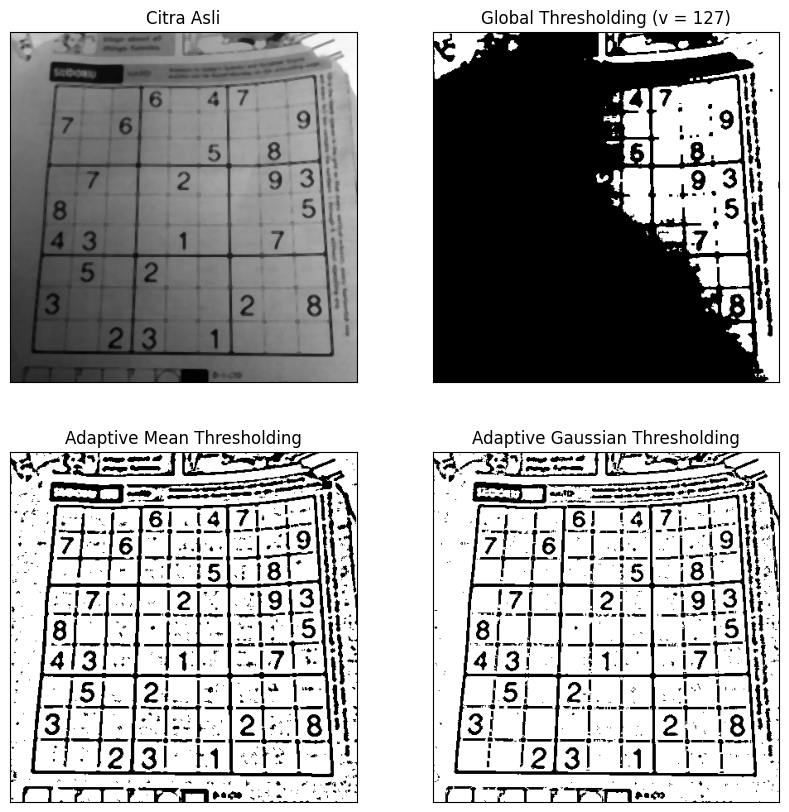

In [ ]:
filename = ('/content/drive/MyDrive/images/week10/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
# gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
  plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### Otsu's Threshold dengan Library OpenCv

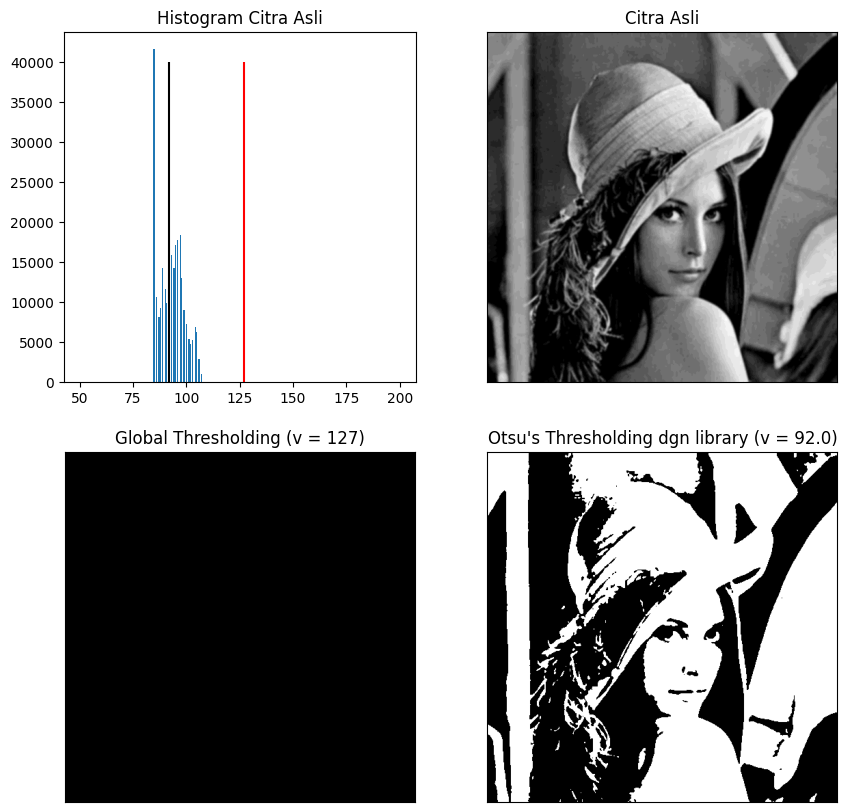

In [ ]:
# Dengan Library
filename = ('/content/drive/MyDrive/images/week10/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


### Otsu's Threshold tanpa Gaussian Filter dan dengan menggunakan Gaussian Filter.

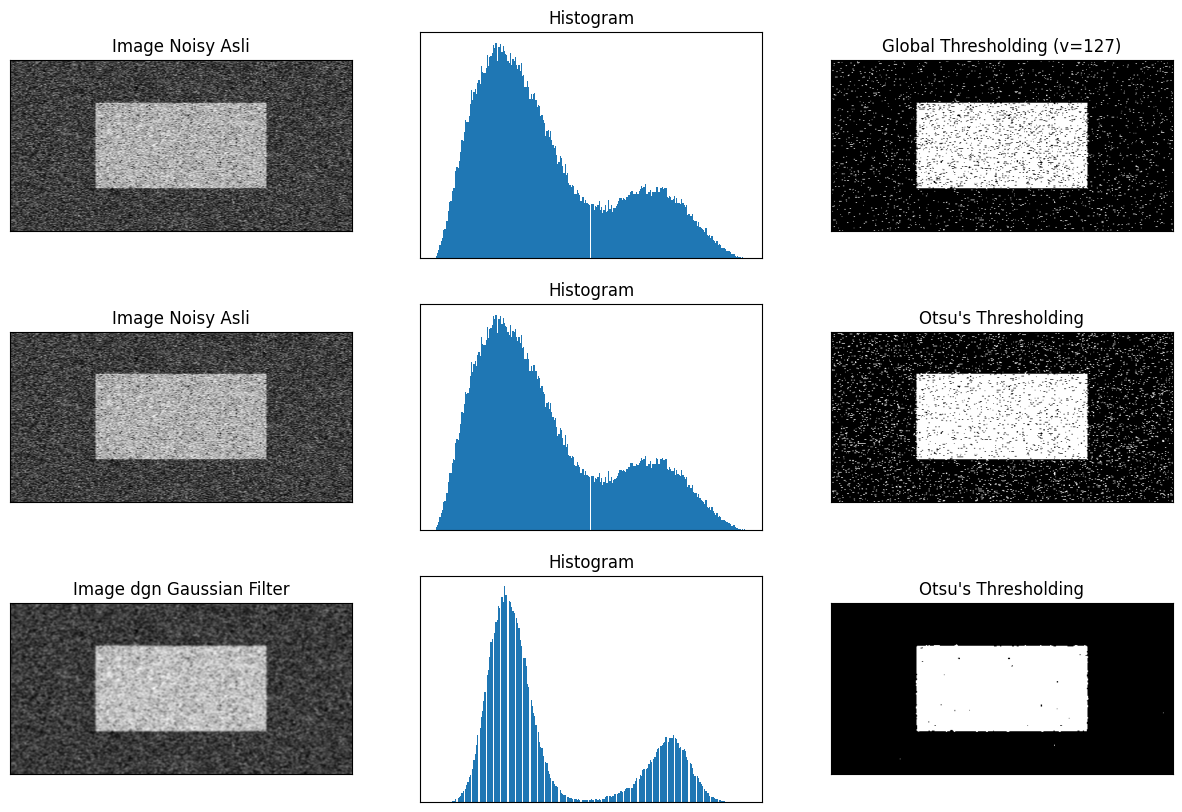

In [ ]:
filename = ('/content/drive/MyDrive/images/week10/noisy2.png')
img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)', 'Image Noisy Asli','Histogram',"Otsu's Thresholding", 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
  plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
  plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
  plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
  plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### Segmentasi Citra menggunakan K-Means

(<Axes: >, <matplotlib.image.AxesImage at 0x7a298c5393c0>)

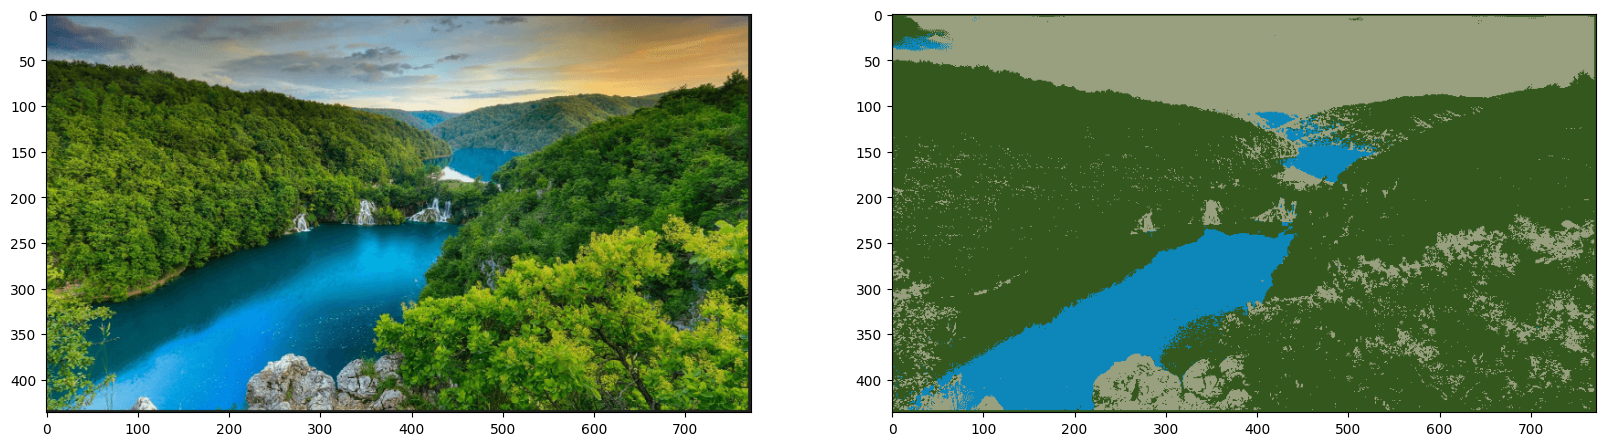

In [ ]:
filename = ('/content/drive/MyDrive/images/week10/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan, sedangkan image aslinya adalah array 3D selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
 putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

## Tugas Praktikum

### 1.  Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170

In [ ]:
filename = ('/content/drive/MyDrive/images/week10/gradient.jpg')

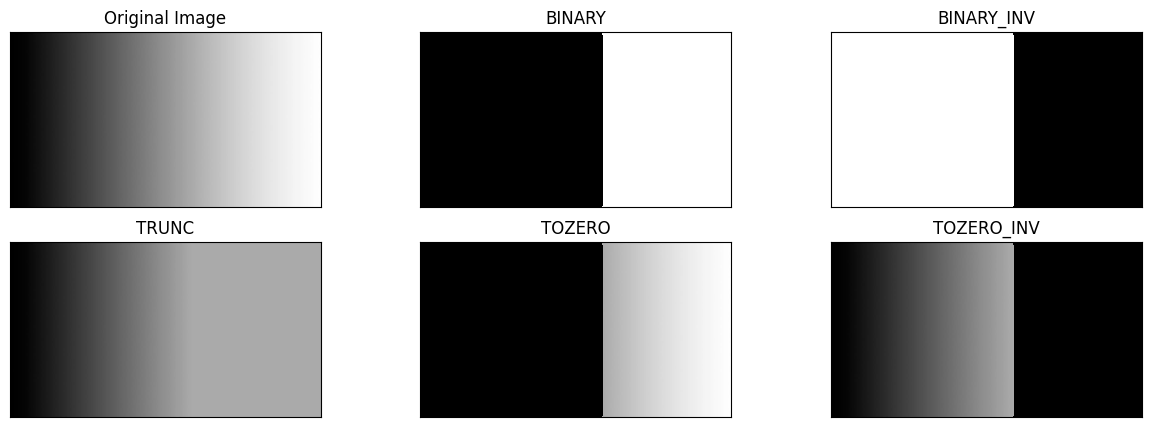

In [ ]:
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>170, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

## 2. Otsu Thresholding tanpa menggunakan Library

In [ ]:
img = cv2.imread('/content/drive/MyDrive/images/week10/ktp.png', 0)

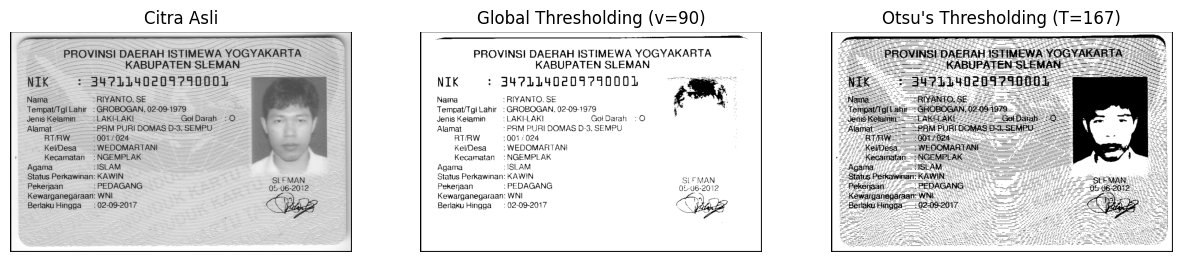

In [ ]:
# Hitung histogram citra
hist = np.histogram(img, bins=256, range=(0, 256))[0]

# Global threshold dengan v = 90
threshold_value = 90
global_thresholded = (img > threshold_value).astype(np.uint8) * 255
img = img.astype(np.uint8)

# Hitung histogram citra
hist = np.histogram(img, bins=256, range=(0, 256))[0]

# Hitung jumlah total pixel
total_pixel = img.shape[0] * img.shape[1]

# Menghitung probabilitas masing-masing level intensitas
prob = hist / total_pixel

# Inisialisasi variabel untuk Otsu's threshold
best_threshold = 0
best_variance = 0

# Menghitung rata-rata total
total_mean = np.sum(np.arange(256) * prob)

# Loop untuk mencari nilai ambang batas Otsu yang optimal
for threshold in range(256):
    # Probabilitas kelas atas
    prob_1 = np.sum(prob[:threshold])

    # Probabilitas kelas bawah
    prob_2 = 1 - prob_1

    # Rata-rata kelas atas
    mean_1 = np.sum(np.arange(threshold) * prob[:threshold]) / prob_1 if prob_1 > 0 else 0

    # Rata-rata kelas bawah
    mean_2 = (total_mean - (mean_1 * prob_1)) / prob_2 if prob_2 > 0 else 0

    # Varians antara kelas
    between_class_variance = prob_1 * prob_2 * (mean_1 - mean_2) ** 2

    if between_class_variance > best_variance:
        best_variance = between_class_variance
        best_threshold = threshold

# Terapkan Otsu's threshold
otsu_thresholded = (img > best_threshold).astype(np.uint8) * 255

plt.figure(figsize=(15,5))

# Tampilkan citra asli
plt.subplot(131)
img_with_border = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.rectangle(img_with_border, (0, 0), (img.shape[1], img.shape[0]), (0, 0, 0), 5)
plt.imshow(img_with_border)
plt.title('Citra Asli')
plt.axis("off")

# Tampilkan citra dengan global threshold
plt.subplot(132)
global_thresholded_with_border = cv2.cvtColor(global_thresholded, cv2.COLOR_GRAY2BGR)
cv2.rectangle(global_thresholded_with_border, (0, 0), (img.shape[1], img.shape[0]), (0, 0, 0), 5)
plt.imshow(global_thresholded_with_border)
plt.title('Global Thresholding (v=90)')
plt.axis("off")

# Tampilkan citra dengan Otsu's threshold
plt.subplot(133)
otsu_thresholded_with_border = cv2.cvtColor(otsu_thresholded, cv2.COLOR_GRAY2BGR)
cv2.rectangle(otsu_thresholded_with_border, (0, 0), (img.shape[1], img.shape[0]), (0, 0, 0), 5)
plt.imshow(otsu_thresholded_with_border)
plt.title(f"Otsu's Thresholding (T={best_threshold})")
plt.axis("off")

plt.show()

## 3. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg

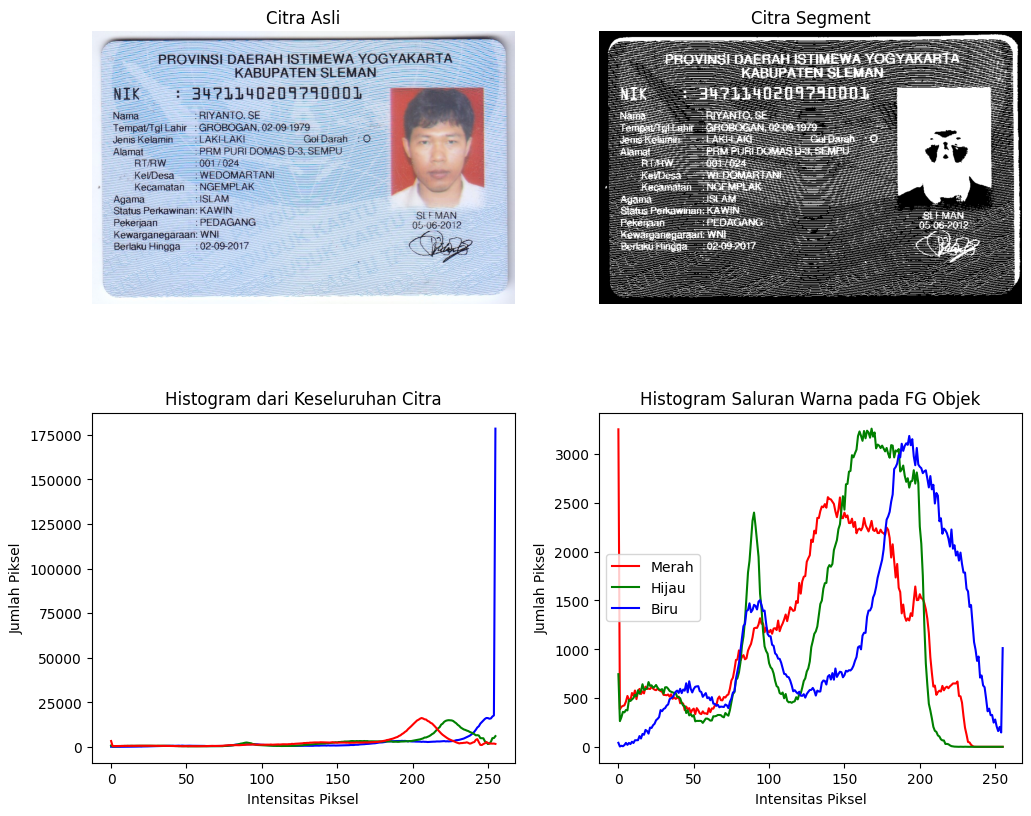

In [ ]:

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/images/week10/ktp.png')

# Terapkan threshold
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresholded = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
foreground = cv2.bitwise_not(thresholded)

# Buat mask untuk citra tersegmentasi (foreground)
mask = thresholded > 0

# Memisahkan saluran warna
b, g, r = cv2.split(img)

# Hitung histogram pada citra keseluruhan
hist_full_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_full_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_full_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Hitung histogram pada citra tersegmentasi (foreground) untuk masing-masing saluran warna
hist_red = cv2.calcHist([r], [0], foreground, [256], [0, 256])
hist_green = cv2.calcHist([g], [0], foreground, [256], [0, 256])
hist_blue = cv2.calcHist([b], [0], foreground, [256], [0, 256])

# Tampilkan citra asli
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis("off")

# Tampilkan citra tersegmentasi (foreground)
plt.subplot(222)
plt.imshow(foreground, cmap='gray')
plt.title('Citra Segment')
plt.axis("off")

# Tampilkan histogram pada citra keseluruhan
plt.subplot(223)
plt.plot(hist_full_b, color='blue', label='Merah')
plt.plot(hist_full_g, color='green', label='Hijau')
plt.plot(hist_full_r, color='red', label='Biru')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Tampilkan histogram pada citra tersegmentasi (foreground) untuk masing-masing saluran warna
plt.subplot(224)
plt.plot(hist_red, color='red', label='Merah')
plt.plot(hist_green, color='green', label='Hijau')
plt.plot(hist_blue, color='blue', label='Biru')
plt.title('Histogram Saluran Warna pada FG Objek')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.show()

## 4. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

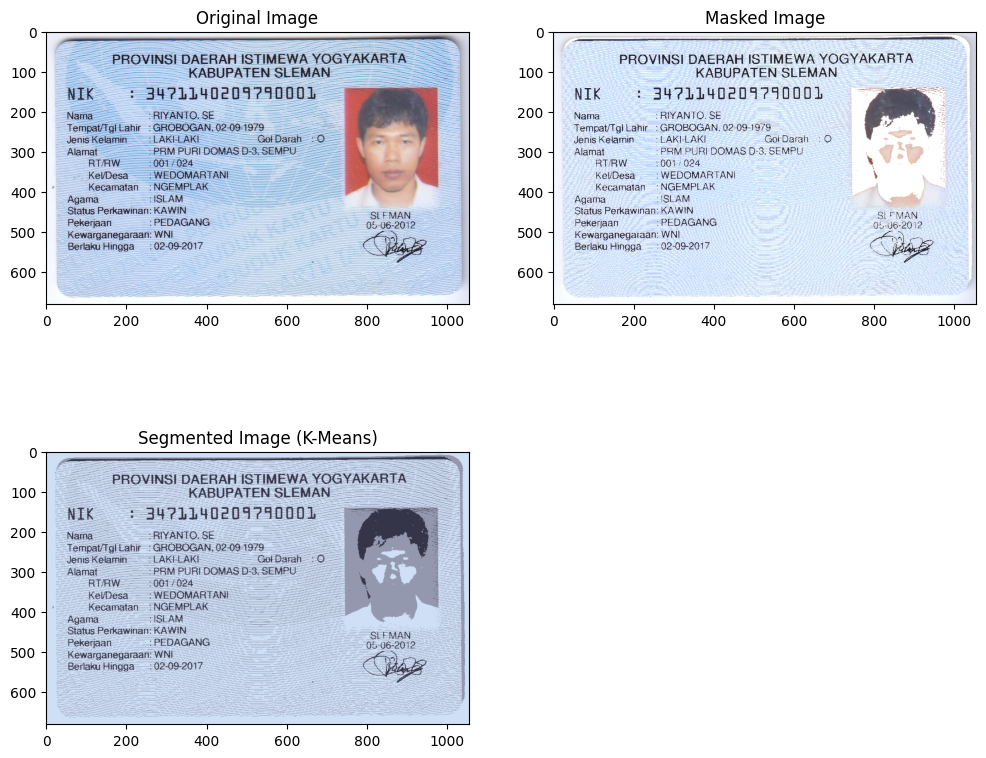

In [ ]:
from sklearn.cluster import KMeans

# Load the image
img = cv2.imread('/content/drive/MyDrive/images/week10/ktp.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Meratakan nilai piksel
pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# # Mendefinisikan kriteria dan jumlah clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3

# Implementasi K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi centers ke integer
centers = np.uint8(centers)

# Meratakan array label
labels = labels.flatten()

# Membuat masked image dengan mengubah satu cluster menjadi putih
masked_image = np.copy(img_rgb)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img_rgb.shape)

# Mengonversi gambar tersegmentasi kembali ke bentuk asli
segmented_image = centers[labels].reshape(img_rgb.shape)

# Menampilkan original image, segmented image, dan masked image
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

### Tugas Praktikum

Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

In [ ]:
!pip install pytesseract

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

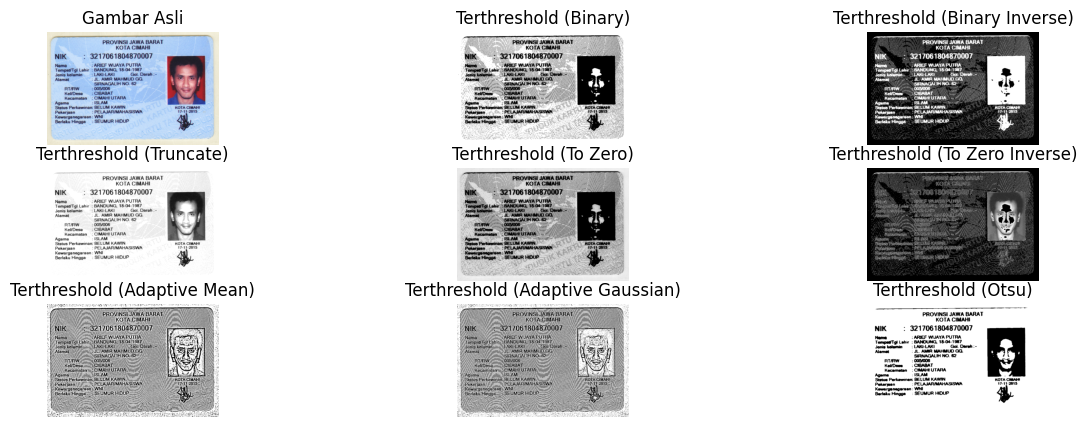

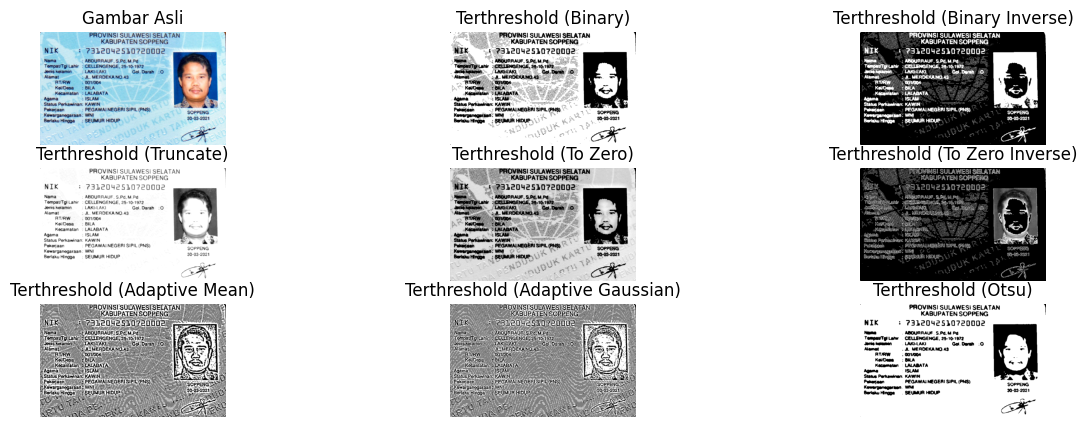

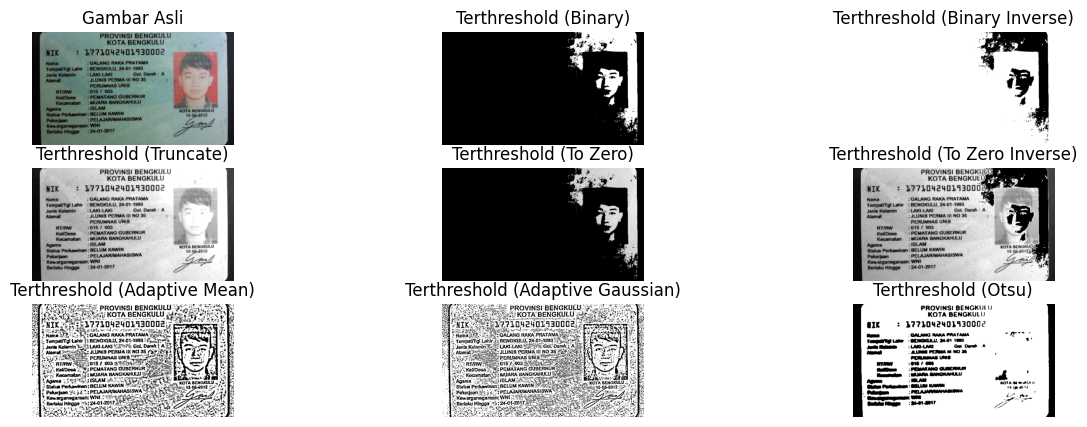

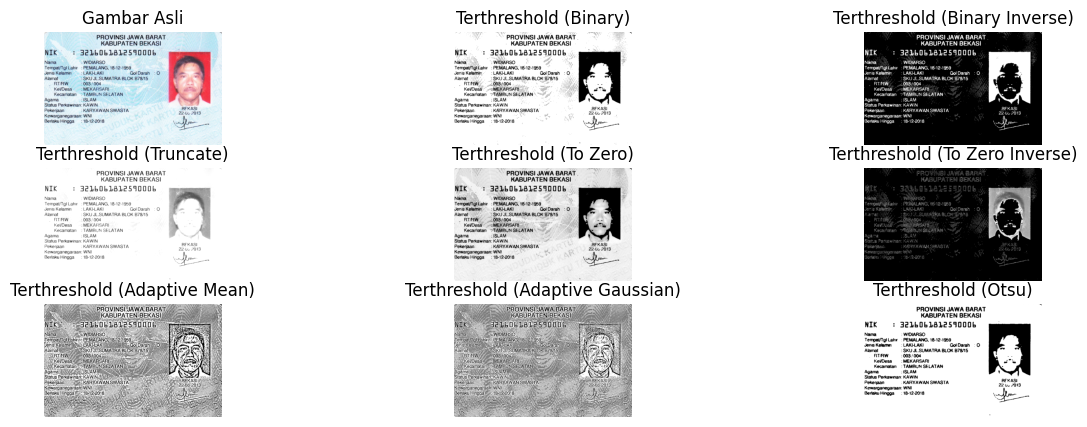

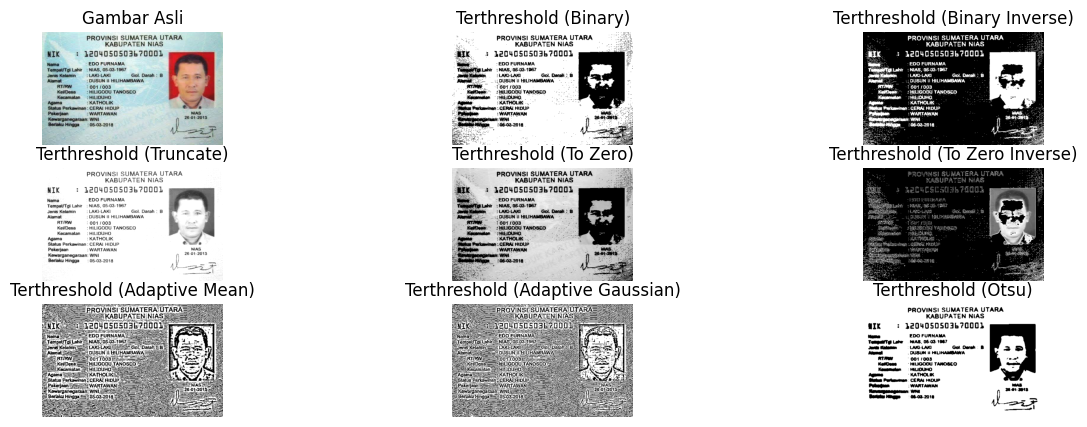

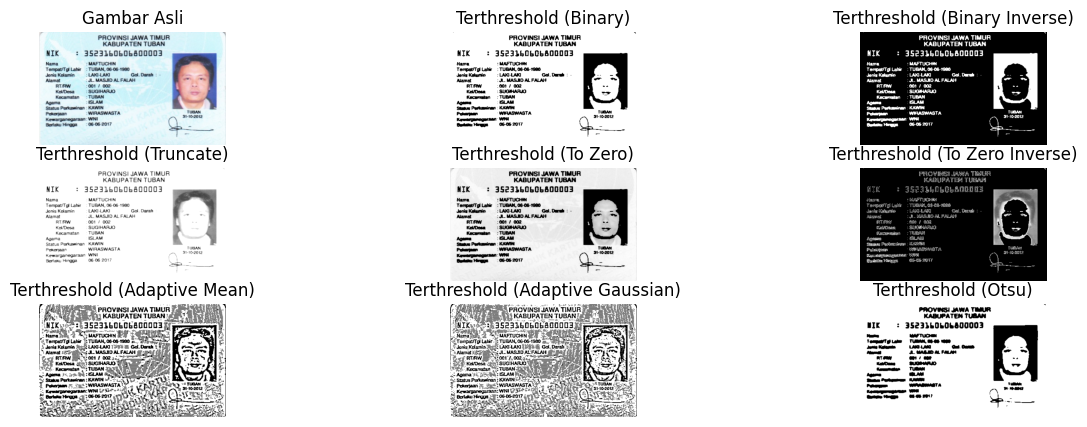

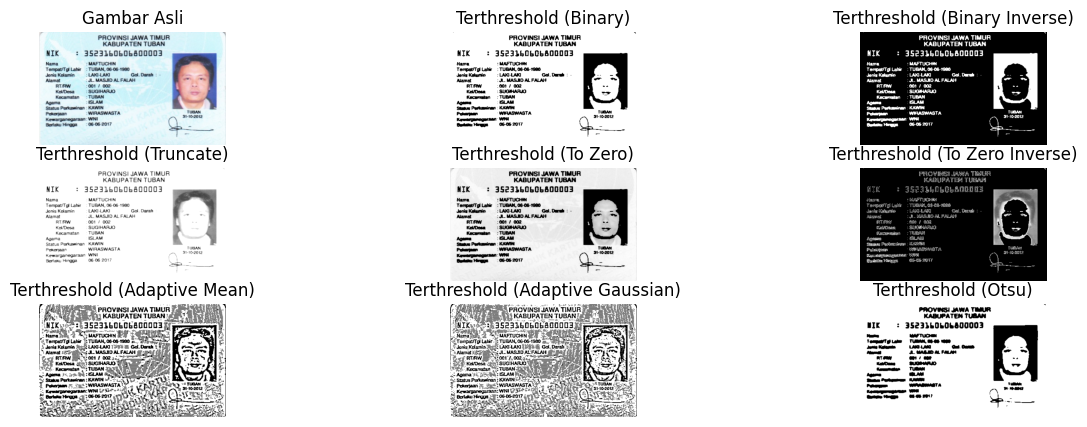

Gambar Hasil_KTP tidak dapat dibaca.


In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

def apply_threshold(image, method, threshold_value):
    if method == 'Binary':
        _, thresholded_image = cv.threshold(image, threshold_value, 255, cv.THRESH_BINARY)
    elif method == 'Binary Inverse':
        _, thresholded_image = cv.threshold(image, threshold_value, 255, cv.THRESH_BINARY_INV)
    elif method == 'Truncate':
        _, thresholded_image = cv.threshold(image, threshold_value, 255, cv.THRESH_TRUNC)
    elif method == 'To Zero':
        _, thresholded_image = cv.threshold(image, threshold_value, 255, cv.THRESH_TOZERO)
    elif method == 'To Zero Inverse':
        _, thresholded_image = cv.threshold(image, threshold_value, 255, cv.THRESH_TOZERO_INV)
    elif method == 'Adaptive Mean':
        thresholded_image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
    elif method == 'Adaptive Gaussian':
        thresholded_image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
    elif method == 'Otsu':
        blur = cv.GaussianBlur(image, (5, 5), 0)
        _, thresholded_image = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    return thresholded_image

folder_path = '/content/drive/MyDrive/images/KTP_More'
threshold_value = 170
threshold_methods = ['Binary', 'Binary Inverse', 'Truncate', 'To Zero', 'To Zero Inverse', 'Adaptive Mean', 'Adaptive Gaussian', 'Otsu']

for i, file_ktp in enumerate(os.listdir(folder_path)):
    path_ktp = os.path.join(folder_path, file_ktp)
    gambar_ktp = cv.imread(path_ktp)

    if gambar_ktp is not None:
        gambar_abu = cv.cvtColor(gambar_ktp, cv.COLOR_BGR2GRAY)

        plt.figure(figsize=(15, 5))

        plt.subplot(3, 3, 1)
        plt.axis('off')
        plt.imshow(cv.cvtColor(gambar_ktp, cv.COLOR_BGR2RGB))
        plt.title('Gambar Asli')

        for j, metode in enumerate(threshold_methods):
            gambar_terthreshold = apply_threshold(gambar_abu, metode, threshold_value)

            plt.subplot(3, 3, j + 2)
            plt.axis('off')
            plt.imshow(gambar_terthreshold, cmap='gray')
            plt.title(f'Terthreshold ({metode})')

        plt.show()
    else:
        print(f"Gambar {file_ktp} tidak dapat dibaca.")